<a href="https://colab.research.google.com/github/yasushisakai/liquid_democracy_colab/blob/main/liquid_democracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd
import numpy as np
import networkx as nx

num_delegates = 3
num_intermediaries = 1
num_policies = 3

votes = {
    'alice':    [  0, 0.1, 0.2,   0, 0.3, 0.2, 0.2], # delegate
    'bob':      [0.2,   0,   0, 0.8,   0,   0,   0], # delegate
    'charlie':  [  0,   0,   0,   0,   0,   0, 1.0], # delegate
    'japanese': [  0,   0,   0,   0, 0.5, 0.5,   0], # intermediate: equally votes to 'ramen' and 'sushi'
    'ramen':    [  0,   0,   0,   0, 1.0,   0,   0], # policy
    'sushi':    [  0,   0,   0,   0,   0, 1.0,   0], # policy
    'tacos':    [  0,   0,   0,   0,   0,   0, 1.0], # policy
}

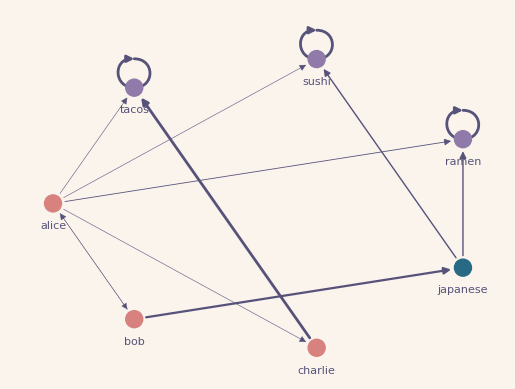

In [90]:
# visualizing the vote matrix
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

# nodes
labels = {}
keys = list(votes.keys())
node_color = ['#d7827e']*3 + ['#286983']*1 + ['#907aa9']*3
for (i, k) in enumerate(keys):
  G.add_node(i, name=k)
  labels[i] = k
# edges
widths = []
for (i, targets) in enumerate(list(votes.values())):
  for (j, value) in enumerate(targets):
    if value > 0.0 :
      G.add_edge(i, j, weight=value)
      widths.append(value*2)
      
pos = nx.shell_layout(G, scale=0.2)
label_pos = {k:([v[0], v[1]-0.03]) for k,v in pos.items()}

fig, ax = plt.subplots()
nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=150)
nx.draw_networkx_labels(G, label_pos, labels, font_size=8, font_color='#575279')
nx.draw_networkx_edges(G, pos, width=widths, edge_color='#575279')
ax.set_facecolor('#faf4ed')
ax.axis('off')
fig.set_facecolor('#faf4ed')
plt.show()

        results
ramen  0.816327
sushi  0.693878
tacos  1.489796
          influences
alice       1.200000
bob         1.100000
charlie     1.244898
japanese    1.897959


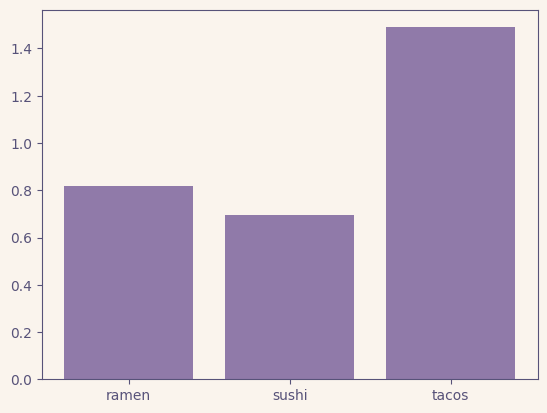

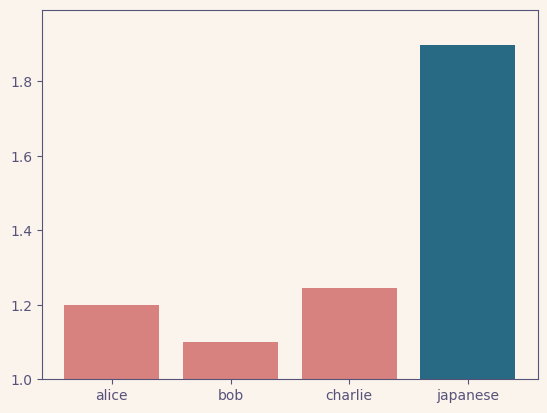

In [138]:
# spinning the matrix

v = pd.DataFrame(data = votes).to_numpy()
a = np.eye(len(votes))
influence = np.eye(len(votes))

for i in range(100):
    a = np.dot(v, a)
    influence += a 

sub = a[np.ix_(range(num_delegates+num_intermediaries, len(votes)), range(0, num_delegates))]
results = np.sum(sub, axis = 1)
results_df = pd.DataFrame(data=results, index=['ramen', 'sushi', 'tacos'], columns=['results'])

print(results_df)

sub = influence[np.ix_(range(0, num_delegates+num_intermediaries), range(0, num_delegates+num_intermediaries))]
influences = np.sum(sub, axis = 1) / sub.diagonal()
influences_df = pd.DataFrame(data=influences, index=['alice', 'bob', 'charlie', 'japanese'], columns=['influences'])
print(influences_df)

# plotting
base='#575279'

fig, ax = plt.subplots()
fig.set_facecolor('#faf4ed')
# results_df.plot(kind='bar', ax=ax, color='#907aa9')
plt.bar(['ramen','sushi','tacos'], results, color='#907aa9')
ax.set_facecolor('#faf4ed')
[s.set_color(base) for s in list(ax.spines.values())]
ax.xaxis.label.set_color(base)
ax.yaxis.label.set_color(base)
ax.tick_params(axis='x', colors=base)
ax.tick_params(axis='y', colors=base)
fig.show()

fig, ax = plt.subplots()
colors=['#d7827e'] * num_delegates + ['#286983'] * num_intermediaries
fig.set_facecolor('#faf4ed')
plt.bar(['alice','bob','charlie','japanese'], influences, color=colors)
ax.set_facecolor('#faf4ed')
[s.set_color(base) for s in list(ax.spines.values())]
ax.xaxis.label.set_color(base)
ax.yaxis.label.set_color(base)
ax.tick_params(axis='x', colors=base)
ax.tick_params(axis='y', colors=base)
plt.ylim((1.0, None))
fig.show()


policy wise 'tacos' wins and 'japanese' is most influential